## Run Dino Run
Let's make a dino run with power of computer vision and couple of IO methods

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import dino.search as ds

In [3]:
search_area = ds.read_image_gray('test_assets/several_cactuses.png')
cactus = ds.read_image_gray('assets/cactus_day.png')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

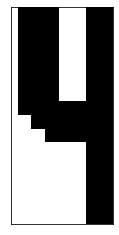

In [4]:
plt.imshow(cactus,'gray')
plt.xticks([]),plt.yticks([])

In [5]:
res = cv2.matchTemplate(search_area, cactus, cv2.TM_CCOEFF_NORMED)
threshold = 0.7
loc = np.where(res >= threshold)

In [6]:
res.shape

(192, 1230)

In [7]:
dtype = [('left', int), ('top', int)]
coords = np.array(list(zip(*loc[::-1])), dtype=dtype)
np.sort(coords, order='left')

array([( 194, 118), ( 194, 119), ( 716, 127), ( 716, 128), ( 716, 129),
       ( 716, 130), ( 716, 131), ( 716, 132), ( 716, 133), (1048, 127),
       (1048, 128), (1048, 129), (1048, 130), (1048, 131), (1048, 132),
       (1048, 133), (1072, 116), (1072, 117), (1072, 118), (1072, 119),
       (1072, 120), (1072, 121), (1072, 122), (1082, 128), (1082, 129),
       (1082, 130), (1082, 131), (1082, 132), (1082, 133), (1082, 134),
       (1082, 135), (1115, 121), (1115, 122), (1115, 123), (1116, 117),
       (1116, 118), (1116, 119), (1116, 120), (1116, 121), (1116, 122),
       (1116, 123), (1116, 124), (1116, 125), (1117, 122), (1117, 123)],
      dtype=[('left', '<i8'), ('top', '<i8')])

In [8]:
ds.group_coords(list(zip(*loc[::-1])))
# sorted([(1,2), (2,1)], key=lambda tup: tup[0])

[(1072, 116), (1072, 117), (1116, 117), (194, 118), (1072, 118), (1116, 118), (194, 119), (1072, 119), (1116, 119), (1072, 120), (1116, 120), (1072, 121), (1115, 121), (1116, 121), (1072, 122), (1115, 122), (1116, 122), (1117, 122), (1115, 123), (1116, 123), (1117, 123), (1116, 124), (1116, 125), (716, 127), (1048, 127), (716, 128), (1048, 128), (1082, 128), (716, 129), (1048, 129), (1082, 129), (716, 130), (1048, 130), (1082, 130), (716, 131), (1048, 131), (1082, 131), (716, 132), (1048, 132), (1082, 132), (716, 133), (1048, 133), (1082, 133), (1082, 134), (1082, 135)]


[(194, 118), (716, 130), (1068, 127), (1115, 121)]

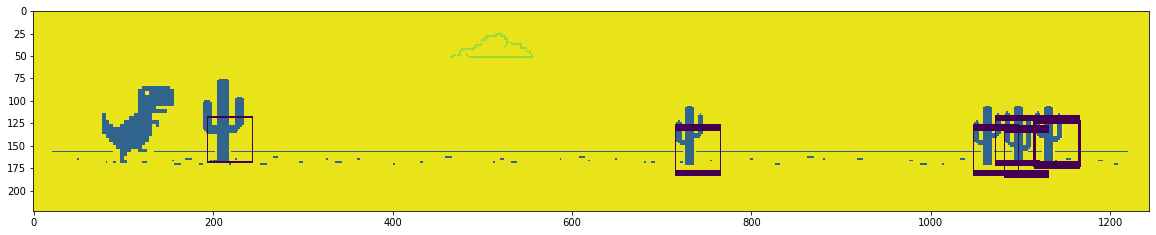

In [9]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(search_area, pt, (pt[0] + 50, pt[1] + 50), (0,0,255), 1)

plt.figure(figsize=(20, 8))
plt.imshow(search_area)